<a href="https://colab.research.google.com/github/Chathurya99/Pose_Fit_FYP/blob/master/workout_lunges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [ ]:
# Upload first your data before execute these code below
path_workout = "/content/lungesNew.csv"; # change this
path_other = "/content/dancingNew.csv"; # change this
name_class = "Lunges" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,323.98340,97.03372,328.64478,90.928055,317.64276,90.644684,335.71423,92.744194,310.55652,93.814900,...,308.53100,218.30724,335.54200,273.03964,311.21048,273.04688,334.50860,328.04285,313.31454,328.26816
1,323.97200,72.39136,328.89484,65.392380,318.23480,65.188126,335.26990,66.826070,311.48804,67.721320,...,309.98590,202.35988,335.80994,277.57538,311.32773,278.92710,335.62585,340.57180,313.89966,342.90536
2,323.61737,83.00170,328.24976,76.503460,317.70633,76.006750,334.96620,77.585434,311.23645,79.471405,...,309.91120,210.03127,335.05090,273.01086,311.59240,274.55908,333.64368,332.09808,314.34372,335.06647
3,323.86298,76.74611,328.59980,69.560980,318.02470,69.787140,335.25037,70.529740,311.12036,72.242370,...,310.29780,207.02737,335.60120,277.30140,312.08728,278.20114,335.88885,337.35352,312.83313,341.38242
4,323.75740,80.22829,328.58936,72.973160,318.14612,72.917206,334.84497,74.767006,310.81348,76.000880,...,309.67790,207.46397,334.81543,273.66635,311.56530,275.02414,333.10663,334.74338,314.68652,336.81726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,339.75560,195.03857,345.86490,185.882980,332.29210,186.222900,354.35700,188.241090,322.67780,190.023500,...,322.10670,308.77856,349.70950,373.07712,317.60470,390.51935,350.52136,443.97467,324.85715,363.59842
5995,338.71362,191.49231,345.12482,182.216870,332.01178,182.466770,353.29254,185.320110,322.04504,186.048780,...,322.04620,306.10270,349.15650,373.26578,317.43875,388.69067,350.25702,445.65494,327.14970,363.74805
5996,338.05560,185.17708,344.59750,176.946580,331.19473,176.560130,353.01184,180.586750,321.67640,180.925830,...,321.36432,302.61353,348.02258,367.47525,317.24588,385.27966,349.70844,442.47595,327.34064,361.62558
5997,338.29248,183.67973,344.39430,175.342670,330.90125,175.173680,353.22232,177.534100,321.42420,179.433060,...,321.76672,300.41122,348.19270,368.97726,316.97147,384.38820,349.88550,444.67240,328.72028,360.30273


In [ ]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,283.832428,3.261488,286.616516,2.132464,282.971100,2.140022,291.610474,0.405160,278.714417,-0.175094,...,279.287353,34.606720,297.084228,76.048515,263.216705,73.308006,291.952972,114.293518,250.683868,108.383843
1,291.134003,13.201362,296.236145,12.011653,289.152008,11.517987,298.787964,13.838686,283.981415,12.037097,...,278.720734,75.596214,297.091248,117.803284,260.679932,116.043617,295.309021,136.353622,247.596207,132.339142
2,292.700165,48.347771,296.407288,45.845058,289.456848,45.123451,300.045227,51.192543,285.603516,49.239761,...,278.360535,122.935440,295.779602,163.765427,261.616242,161.691376,295.156006,162.086548,261.474396,162.064529
3,293.455200,92.769463,297.173218,89.518478,290.270019,88.554550,300.732056,95.324837,286.138855,93.366402,...,278.394073,175.964203,303.519440,202.631729,269.606323,201.267471,311.508270,189.915741,270.006287,206.183655
4,294.013336,149.223969,297.651825,145.760773,291.141083,145.013199,301.388367,151.297852,286.986877,149.154602,...,279.398987,237.554321,311.016968,247.752091,279.216919,244.538666,311.418854,248.527161,261.204285,240.725357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,207.854904,189.067230,214.580566,182.875931,203.346573,183.571381,224.942383,186.673142,200.337204,188.293808,...,185.461365,319.757324,170.359879,432.782593,134.044922,376.923126,169.372528,424.383575,141.523590,403.512329
4996,207.101227,190.934265,213.798615,184.352432,202.715820,185.226608,223.704407,187.730972,199.664230,189.612076,...,185.684448,323.786316,173.312256,438.218109,135.790054,385.614654,174.983902,431.024414,143.490845,407.224365
4997,206.485367,194.311813,213.608475,186.829285,202.255920,187.510681,224.579941,190.718170,198.156403,192.830643,...,187.042831,324.533752,176.893036,438.149719,139.146652,394.048981,182.628754,424.380127,164.764862,409.367096
4998,206.518585,197.668884,213.182343,191.152054,202.091827,191.349030,223.996963,194.119995,198.338959,195.726913,...,186.937637,327.233063,182.853775,438.189484,144.491684,402.988525,186.858993,428.888733,166.053833,401.951324


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,323.98340,97.03372,328.64478,90.928055,317.64276,90.644684,335.71423,92.744194,310.55652,93.814900,...,218.30724,335.54200,273.03964,311.21048,273.04688,334.50860,328.04285,313.31454,328.26816,Lunges
1,323.97200,72.39136,328.89484,65.392380,318.23480,65.188126,335.26990,66.826070,311.48804,67.721320,...,202.35988,335.80994,277.57538,311.32773,278.92710,335.62585,340.57180,313.89966,342.90536,Lunges
2,323.61737,83.00170,328.24976,76.503460,317.70633,76.006750,334.96620,77.585434,311.23645,79.471405,...,210.03127,335.05090,273.01086,311.59240,274.55908,333.64368,332.09808,314.34372,335.06647,Lunges
3,323.86298,76.74611,328.59980,69.560980,318.02470,69.787140,335.25037,70.529740,311.12036,72.242370,...,207.02737,335.60120,277.30140,312.08728,278.20114,335.88885,337.35352,312.83313,341.38242,Lunges
4,323.75740,80.22829,328.58936,72.973160,318.14612,72.917206,334.84497,74.767006,310.81348,76.000880,...,207.46397,334.81543,273.66635,311.56530,275.02414,333.10663,334.74338,314.68652,336.81726,Lunges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,339.75560,195.03857,345.86490,185.882980,332.29210,186.222900,354.35700,188.241090,322.67780,190.023500,...,308.77856,349.70950,373.07712,317.60470,390.51935,350.52136,443.97467,324.85715,363.59842,Lunges
5995,338.71362,191.49231,345.12482,182.216870,332.01178,182.466770,353.29254,185.320110,322.04504,186.048780,...,306.10270,349.15650,373.26578,317.43875,388.69067,350.25702,445.65494,327.14970,363.74805,Lunges
5996,338.05560,185.17708,344.59750,176.946580,331.19473,176.560130,353.01184,180.586750,321.67640,180.925830,...,302.61353,348.02258,367.47525,317.24588,385.27966,349.70844,442.47595,327.34064,361.62558,Lunges
5997,338.29248,183.67973,344.39430,175.342670,330.90125,175.173680,353.22232,177.534100,321.42420,179.433060,...,300.41122,348.19270,368.97726,316.97147,384.38820,349.88550,444.67240,328.72028,360.30273,Lunges


In [ ]:
df_workout = df_workout[:1415]
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,323.98340,97.03372,328.64478,90.928055,317.64276,90.644684,335.71423,92.744194,310.55652,93.814900,...,218.30724,335.54200,273.03964,311.21048,273.04688,334.50860,328.04285,313.31454,328.26816,Lunges
1,323.97200,72.39136,328.89484,65.392380,318.23480,65.188126,335.26990,66.826070,311.48804,67.721320,...,202.35988,335.80994,277.57538,311.32773,278.92710,335.62585,340.57180,313.89966,342.90536,Lunges
2,323.61737,83.00170,328.24976,76.503460,317.70633,76.006750,334.96620,77.585434,311.23645,79.471405,...,210.03127,335.05090,273.01086,311.59240,274.55908,333.64368,332.09808,314.34372,335.06647,Lunges
3,323.86298,76.74611,328.59980,69.560980,318.02470,69.787140,335.25037,70.529740,311.12036,72.242370,...,207.02737,335.60120,277.30140,312.08728,278.20114,335.88885,337.35352,312.83313,341.38242,Lunges
4,323.75740,80.22829,328.58936,72.973160,318.14612,72.917206,334.84497,74.767006,310.81348,76.000880,...,207.46397,334.81543,273.66635,311.56530,275.02414,333.10663,334.74338,314.68652,336.81726,Lunges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,329.66638,85.01727,334.99222,77.049080,325.30286,78.566350,345.62167,76.961040,323.87670,80.841680,...,210.63037,347.77203,280.52515,323.02985,279.72450,348.06660,331.07178,320.09520,330.88880,Lunges
1411,329.55603,83.62799,334.82333,75.710365,325.12744,77.372800,345.33490,75.552360,323.43945,79.755400,...,209.27625,348.91943,280.11395,322.99023,279.64468,348.00885,331.37805,319.86932,330.08994,Lunges
1412,329.29126,85.45291,334.88530,77.097680,324.43000,79.160860,345.54376,76.206795,323.57062,81.400530,...,210.15290,348.68384,279.90048,323.23062,281.88190,348.23846,330.96613,320.65850,329.84485,Lunges
1413,329.23856,83.59479,334.42145,75.562210,324.95123,77.451225,345.13330,74.485480,323.38696,79.168190,...,209.28162,349.13977,280.26560,323.47363,281.02370,348.13867,329.95172,320.26825,328.93510,Lunges


In [ ]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,283.832428,3.261488,286.616516,2.132464,282.971100,2.140022,291.610474,0.405160,278.714417,-0.175094,...,34.606720,297.084228,76.048515,263.216705,73.308006,291.952972,114.293518,250.683868,108.383843,other
1,291.134003,13.201362,296.236145,12.011653,289.152008,11.517987,298.787964,13.838686,283.981415,12.037097,...,75.596214,297.091248,117.803284,260.679932,116.043617,295.309021,136.353622,247.596207,132.339142,other
2,292.700165,48.347771,296.407288,45.845058,289.456848,45.123451,300.045227,51.192543,285.603516,49.239761,...,122.935440,295.779602,163.765427,261.616242,161.691376,295.156006,162.086548,261.474396,162.064529,other
3,293.455200,92.769463,297.173218,89.518478,290.270019,88.554550,300.732056,95.324837,286.138855,93.366402,...,175.964203,303.519440,202.631729,269.606323,201.267471,311.508270,189.915741,270.006287,206.183655,other
4,294.013336,149.223969,297.651825,145.760773,291.141083,145.013199,301.388367,151.297852,286.986877,149.154602,...,237.554321,311.016968,247.752091,279.216919,244.538666,311.418854,248.527161,261.204285,240.725357,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,207.854904,189.067230,214.580566,182.875931,203.346573,183.571381,224.942383,186.673142,200.337204,188.293808,...,319.757324,170.359879,432.782593,134.044922,376.923126,169.372528,424.383575,141.523590,403.512329,other
4996,207.101227,190.934265,213.798615,184.352432,202.715820,185.226608,223.704407,187.730972,199.664230,189.612076,...,323.786316,173.312256,438.218109,135.790054,385.614654,174.983902,431.024414,143.490845,407.224365,other
4997,206.485367,194.311813,213.608475,186.829285,202.255920,187.510681,224.579941,190.718170,198.156403,192.830643,...,324.533752,176.893036,438.149719,139.146652,394.048981,182.628754,424.380127,164.764862,409.367096,other
4998,206.518585,197.668884,213.182343,191.152054,202.091827,191.349030,223.996963,194.119995,198.338959,195.726913,...,327.233063,182.853775,438.189484,144.491684,402.988525,186.858993,428.888733,166.053833,401.951324,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,323.983400,97.033720,328.644780,90.928055,317.642760,90.644684,335.714230,92.744194,310.556520,93.814900,...,218.307240,335.542000,273.039640,311.210480,273.046880,334.508600,328.042850,313.314540,328.268160,Lunges
1,323.972000,72.391360,328.894840,65.392380,318.234800,65.188126,335.269900,66.826070,311.488040,67.721320,...,202.359880,335.809940,277.575380,311.327730,278.927100,335.625850,340.571800,313.899660,342.905360,Lunges
2,323.617370,83.001700,328.249760,76.503460,317.706330,76.006750,334.966200,77.585434,311.236450,79.471405,...,210.031270,335.050900,273.010860,311.592400,274.559080,333.643680,332.098080,314.343720,335.066470,Lunges
3,323.862980,76.746110,328.599800,69.560980,318.024700,69.787140,335.250370,70.529740,311.120360,72.242370,...,207.027370,335.601200,277.301400,312.087280,278.201140,335.888850,337.353520,312.833130,341.382420,Lunges
4,323.757400,80.228290,328.589360,72.973160,318.146120,72.917206,334.844970,74.767006,310.813480,76.000880,...,207.463970,334.815430,273.666350,311.565300,275.024140,333.106630,334.743380,314.686520,336.817260,Lunges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410,207.854904,189.067230,214.580566,182.875931,203.346573,183.571381,224.942383,186.673142,200.337204,188.293808,...,319.757324,170.359879,432.782593,134.044922,376.923126,169.372528,424.383575,141.523590,403.512329,other
6411,207.101227,190.934265,213.798615,184.352432,202.715820,185.226608,223.704407,187.730972,199.664230,189.612076,...,323.786316,173.312256,438.218109,135.790054,385.614654,174.983902,431.024414,143.490845,407.224365,other
6412,206.485367,194.311813,213.608475,186.829285,202.255920,187.510681,224.579941,190.718170,198.156403,192.830643,...,324.533752,176.893036,438.149719,139.146652,394.048981,182.628754,424.380127,164.764862,409.367096,other
6413,206.518585,197.668884,213.182343,191.152054,202.091827,191.349030,223.996963,194.119995,198.338959,195.726913,...,327.233063,182.853775,438.189484,144.491684,402.988525,186.858993,428.888733,166.053833,401.951324,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,323.983400,97.033720,328.644780,90.928055,317.642760,90.644684,335.714230,92.744194,310.556520,93.814900,...,308.531000,218.307240,335.542000,273.039640,311.210480,273.046880,334.508600,328.042850,313.314540,328.268160
1,323.972000,72.391360,328.894840,65.392380,318.234800,65.188126,335.269900,66.826070,311.488040,67.721320,...,309.985900,202.359880,335.809940,277.575380,311.327730,278.927100,335.625850,340.571800,313.899660,342.905360
2,323.617370,83.001700,328.249760,76.503460,317.706330,76.006750,334.966200,77.585434,311.236450,79.471405,...,309.911200,210.031270,335.050900,273.010860,311.592400,274.559080,333.643680,332.098080,314.343720,335.066470
3,323.862980,76.746110,328.599800,69.560980,318.024700,69.787140,335.250370,70.529740,311.120360,72.242370,...,310.297800,207.027370,335.601200,277.301400,312.087280,278.201140,335.888850,337.353520,312.833130,341.382420
4,323.757400,80.228290,328.589360,72.973160,318.146120,72.917206,334.844970,74.767006,310.813480,76.000880,...,309.677900,207.463970,334.815430,273.666350,311.565300,275.024140,333.106630,334.743380,314.686520,336.817260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410,207.854904,189.067230,214.580566,182.875931,203.346573,183.571381,224.942383,186.673142,200.337204,188.293808,...,185.461365,319.757324,170.359879,432.782593,134.044922,376.923126,169.372528,424.383575,141.523590,403.512329
6411,207.101227,190.934265,213.798615,184.352432,202.715820,185.226608,223.704407,187.730972,199.664230,189.612076,...,185.684448,323.786316,173.312256,438.218109,135.790054,385.614654,174.983902,431.024414,143.490845,407.224365
6412,206.485367,194.311813,213.608475,186.829285,202.255920,187.510681,224.579941,190.718170,198.156403,192.830643,...,187.042831,324.533752,176.893036,438.149719,139.146652,394.048981,182.628754,424.380127,164.764862,409.367096
6413,206.518585,197.668884,213.182343,191.152054,202.091827,191.349030,223.996963,194.119995,198.338959,195.726913,...,186.937637,327.233063,182.853775,438.189484,144.491684,402.988525,186.858993,428.888733,166.053833,401.951324


In [ ]:
y

,class
0,Lunges
1,Lunges
2,Lunges
3,Lunges
4,Lunges
...,...
6410,other
6411,other
6412,other
6413,other


In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.506224,0.269538,0.513507,0.252578,0.496317,0.251791,0.524553,0.257623,0.485245,0.260597,...,0.482080,0.606409,0.524284,0.758443,0.486266,0.758464,0.522670,0.911230,0.489554,0.911856
1,0.506206,0.201087,0.513898,0.181646,0.497242,0.181078,0.523859,0.185628,0.486700,0.188115,...,0.484353,0.562111,0.524703,0.771043,0.486450,0.774798,0.524415,0.946033,0.490468,0.952515
2,0.505652,0.230560,0.512890,0.212510,0.496416,0.211130,0.523385,0.215515,0.486307,0.220754,...,0.484236,0.583420,0.523517,0.758363,0.486863,0.762664,0.521318,0.922495,0.491162,0.930740
3,0.506036,0.213184,0.513437,0.193225,0.496914,0.193853,0.523829,0.195916,0.486126,0.200673,...,0.484840,0.575076,0.524377,0.770282,0.487636,0.772781,0.524826,0.937093,0.488802,0.948285
4,0.505871,0.222856,0.513421,0.202703,0.497103,0.202548,0.523195,0.207686,0.485646,0.211114,...,0.483872,0.576289,0.523149,0.760184,0.486821,0.763956,0.520479,0.929843,0.491698,0.935603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410,0.324773,0.525187,0.335282,0.507989,0.317729,0.509921,0.351472,0.518537,0.313027,0.523038,...,0.289783,0.888215,0.266187,1.202174,0.209445,1.047009,0.264645,1.178843,0.221131,1.120868
6411,0.323596,0.530373,0.334060,0.512090,0.316743,0.514518,0.349538,0.521475,0.311975,0.526700,...,0.290132,0.899406,0.270800,1.217273,0.212172,1.071152,0.273412,1.197290,0.224204,1.131179
6412,0.322633,0.539755,0.333763,0.518970,0.316025,0.520863,0.350906,0.529773,0.309619,0.535641,...,0.292254,0.901483,0.276395,1.217083,0.217417,1.094581,0.285357,1.178834,0.257445,1.137131
6413,0.322685,0.549080,0.333097,0.530978,0.315768,0.531525,0.349995,0.539222,0.309905,0.543686,...,0.292090,0.908981,0.285709,1.217193,0.225768,1.119413,0.291967,1.191358,0.259459,1.116531


### One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

### Split Dataset

In [ ]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 5132
The number of test data X is: 1283
The number of train data y is : 5132
The number of test daya y is : 1283
The total dataset is : 6415


## Modelling

In [ ]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,882 (19.07 KB)

 Trainable params: 4,882 (19.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7223 - loss: 0.5864 - val_accuracy: 0.7755 - val_loss: 0.3885
Epoch 2/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7746 - loss: 0.4343 - val_accuracy: 0.7755 - val_loss: 0.3349
Epoch 3/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8013 - loss: 0.3597 - val_accuracy: 0.7755 - val_loss: 0.3230
Epoch 4/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8180 - loss: 0.3461 - val_accuracy: 0.8831 - val_loss: 0.3074
Epoch 5/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8466 - loss: 0.3362 - val_accuracy: 0.8940 - val_loss: 0.2938
Epoch 6/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8875 - loss: 0.3004 - val_accuracy: 0.8924 - val_loss: 0.2706
Epoch 7/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8995 - loss: 0.2849 - val_accuracy: 0.9143 - val_loss: 0.2511
Epoch 8/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8928 - loss: 0.2748 - val_accuracy: 0.9010 - v

## Visualization Acc & Loss

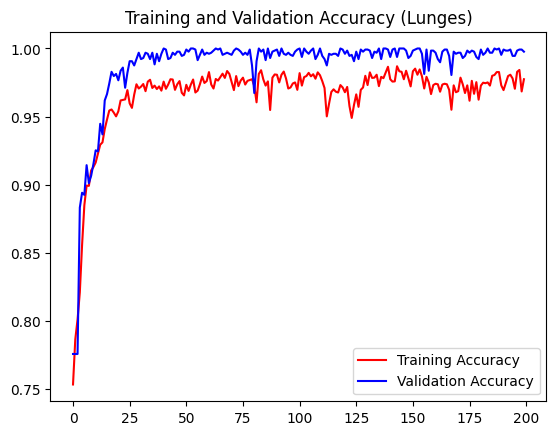

<Figure size 640x480 with 0 Axes>

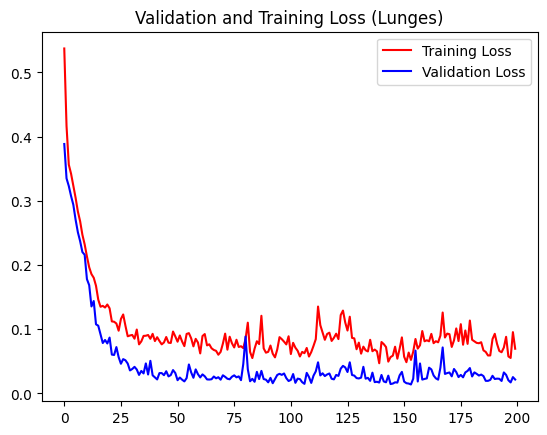

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Lunges)')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss (Lunges)')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.021670861169695854
Test accuracy: 0.9976617097854614


## Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
3007,0.330098,0.459298,0.390368,0.366365,0.299128,0.322421,0.438058,0.460738,0.24773,0.333108,...,0.194743,1.265842,0.461089,1.110143,0.170263,0.979639,0.31257,1.248307,0.282442,1.247483


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : other


In [ ]:
df_data['class'].unique()

array(['Lunges', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


In [ ]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
Lunges


## Export Model

In [ ]:
# Download this file for backup
model.save("model.h5")

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2025-08-28 10:11:35.762618: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756375895.789271   30573 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756375895.797472   30573 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756375895.816641   30573 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756375895.816684   30573 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756375895.816689   30573 computation_placer.cc:177] computation placer alr

In [ ]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

  adding: content/tfjs_float_model_workout/ (stored 0%)
  adding: content/tfjs_float_model_workout/model.json (deflated 82%)
  adding: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 7%)


Don't forget to download tfjs model (check relatable folder)